#Sentiment Analysis using DISTILBERT

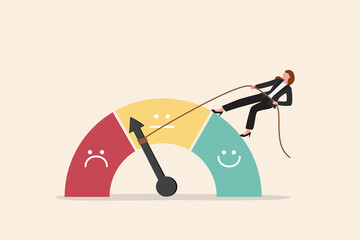

To import the DistilBERT model in Python, you can use the Hugging Face transformers library, which provides a convenient interface to work with various pre-trained transformer models, including DistilBERT. First, you need to install the library:

For this, we'll use the pipeline module from the transformers library, which provides a convenient way to perform various NLP tasks, including sentiment analysis:

#Class Exercise #1

### Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load CSV file into a DataFrame without header
df = pd.read_csv("/content/feedback_data.csv", header=None)

In [ ]:
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...


###Load pre-trained DistilBERT Model and Tokenizer

In [ ]:
from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

###Load BERT Sentiment Analysis Pipeline

In [ ]:
#This method assigned a STAR rating automatically.
#So, we take unlabeled data, perform sentiment analysis using BERT and it gives a score!""

# Load BERT sentiment analysis pipeline
sentiment_analysis_bert = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Iterate over the rows and perform sentiment analysis with BERT
sentiment_results_bert = []
for index, row in df.iterrows():
    text = row[0]  # Access the first (and only) column in each row
    bert_result = sentiment_analysis_bert(text)[0]
    sentiment_label_bert = bert_result['label']
    sentiment_score_bert = bert_result['score']
    sentiment_results_bert.append({"Text": text, "BERT Sentiment Score": sentiment_score_bert, "BERT Sentiment Label": sentiment_label_bert})


# Iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
    print(f"Text: {result['Text']}")
    print(f"BERT Sentiment Score: {result['BERT Sentiment Score']}")
    print(f"BERT Sentiment Label: {result['BERT Sentiment Label']}")
    print()  # Add a blank line for readability

# Convert BERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

# Save BERT sentiment results to a new CSV file
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Text: Your products are excellent. I really love the quality! However
BERT Sentiment Score: 0.5744263529777527
BERT Sentiment Label: 5 stars

Text: The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
BERT Sentiment Score: 0.5543172359466553
BERT Sentiment Label: 4 stars

Text: The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
BERT Sentiment Score: 0.8357024192810059
BERT Sentiment Label: 5 stars

Text: The product didn't meet my expectations
BERT Sentiment Score: 0.4780276417732239
BERT Sentiment Label: 2 stars



In [ ]:
sentiment_df_bert.head()

,Text,BERT Sentiment Score,BERT Sentiment Label
0,Your products are excellent. I really love the...,0.574426,5 stars
1,The customer service team in New York was help...,0.554317,4 stars
2,The new features in the latest release are fan...,0.835702,5 stars
3,The product didn't meet my expectations,0.478028,2 stars


In [ ]:
sentiment_df_bert.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Text                  4 non-null      object 
 1   BERT Sentiment Score  4 non-null      float64
 2   BERT Sentiment Label  4 non-null      object 
dtypes: float64(1), object(2)
memory usage: 224.0+ bytes


In [ ]:
sentiment_df_bert.describe()


,BERT Sentiment Score
count,4.000000
mean,0.610618
std,0.155695
min,0.478028
25%,0.535245
50%,0.564372
75%,0.639745
max,0.835702


This is a pie chart showing the distribution of BERT sentiment labels. The chart shows that 50% of the reviews were labeled as 5 stars, 25% were labeled as 4 stars, and 25% were labeled as 2 stars. This indicates that the majority of the reviews were positive, with a smaller number of neutral and negative reviews.


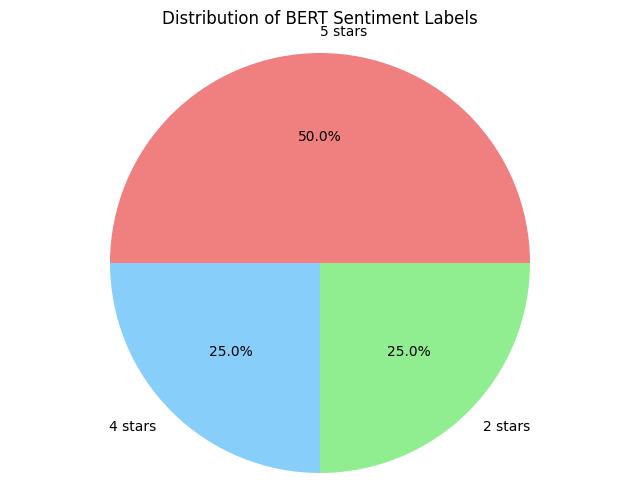

In [ ]:
#Sentiment Pie chart
# Plot a pie chart of sentiment labels
plt.figure(figsize=(8, 6))
sentiment_labels = sentiment_df_bert["BERT Sentiment Label"].value_counts()
plt.pie(sentiment_labels, labels=sentiment_labels.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title("Distribution of BERT Sentiment Labels")
plt.axis('equal')
plt.show()


Bar chart showing Preferred contact Method.

<ipython-input-20-27cf116fa9b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_df_bert,  x="BERT Sentiment Label", palette='muted')


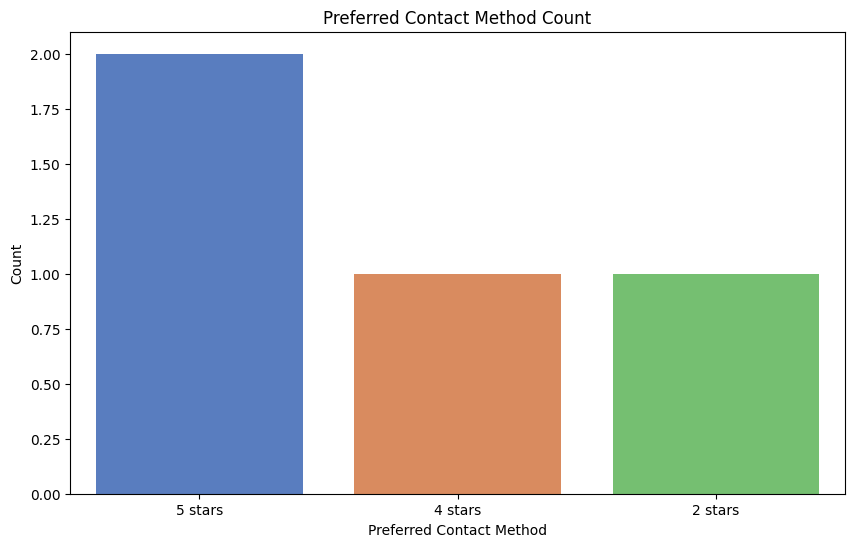

In [ ]:
# Example plot: Preferred Contact Method Count
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment_df_bert,  x="BERT Sentiment Label", palette='muted')
plt.title('Preferred Contact Method Count')
plt.xlabel('Preferred Contact Method')
plt.ylabel('Count')
plt.show()

This is a histogram of BERT sentiment scores. The x-axis shows the sentiment score, and the y-axis shows the frequency of each score. The blue bars represent the frequency of each score, and the blue line represents the density of the scores. The distribution is skewed to the right, which means that there are more positive sentiment scores than negative sentiment scores.

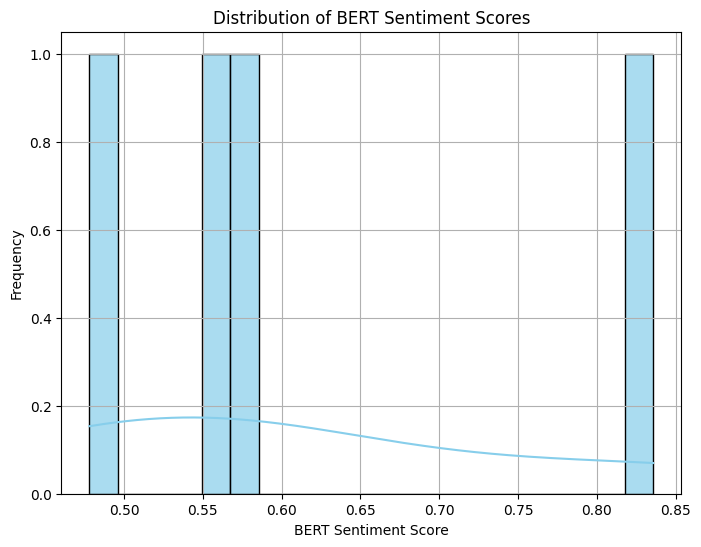

In [ ]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(data=sentiment_df_bert, x="BERT Sentiment Score", bins=20, kde=True, color='skyblue', alpha=0.7)
plt.title("Distribution of BERT Sentiment Scores")
plt.xlabel("BERT Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The box plot shows the distribution of BERT sentiment scores for three different sentiment labels: 5 stars, 4 stars, and 2 stars. The box plot for the 5-star sentiment label is higher than the box plots for the other two sentiment labels, which indicates that the BERT sentiment scores for 5-star reviews are generally higher than the BERT sentiment scores for 4-star and 2-star reviews. This suggests that the BERT model is able to accurately distinguish between positive and negative reviews.

<ipython-input-18-70bc87ba9dc7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sentiment_df_bert, x="BERT Sentiment Label", y="BERT Sentiment Score", palette="pastel")


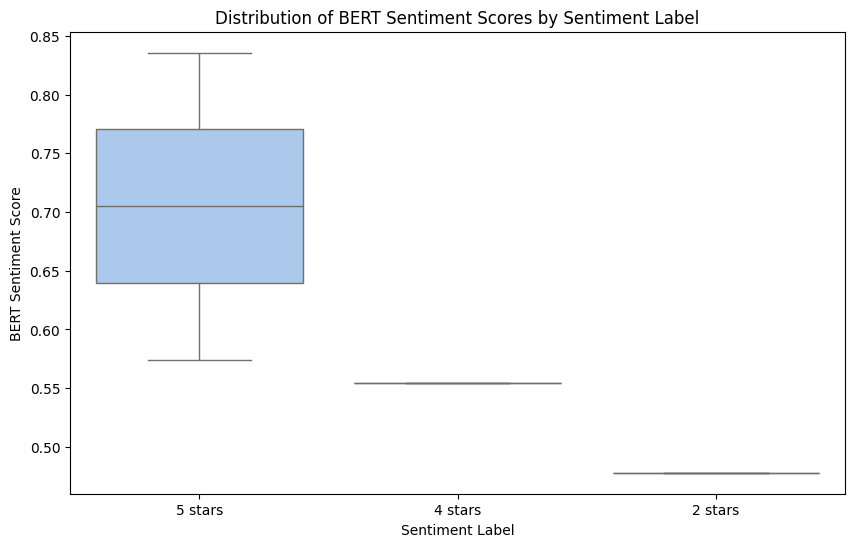

In [ ]:
# Plot a boxplot of sentiment scores by sentiment label
plt.figure(figsize=(10, 6))
sns.boxplot(data=sentiment_df_bert, x="BERT Sentiment Label", y="BERT Sentiment Score", palette="pastel")
plt.title("Distribution of BERT Sentiment Scores by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("BERT Sentiment Score")
plt.show()
